In [ ]:
import sys
sys.path.append(".")
import h2rg

In [73]:
import numpy as np
import astropy.io.fits
import matplotlib.pyplot as plt
import scipy.ndimage 
import astropy.stats
import glob
import warnings

In [ ]:
def imshow(data, vmin, vmax):
    plt.imshow(data,vmin=vmin, vmax=vmax, origin="lower")
    plt.colorbar()
    plt.xticks(np.arange(0,data.shape[1]+1,256))
    plt.yticks(np.arange(0,data.shape[0]+1,256))

In [ ]:
fitspaths = sorted(glob.glob("/Users/alan/Downloads/frida/20251023/*.fits"))

ny = 5
nx = 4
vrange = 50
i0 = 4

#fig, ax = plt.subplots(ny, nx, figsize=(4,6))
for i in range(0, ny * nx):

    header0, data0 = h2rg.readfits(fitspaths[i0+2*i+0])
    header1, data1 = h2rg.readfits(fitspaths[i0+2*i+1])

    data = data1 - data0
    data -= np.nanmedian(data[4:2044,4:2044])
    data = h2rg.channelcorrection(data, order=1, verbose=False)
    data = h2rg.rowcorrection(data, nfilter=51, verbose=True)

    #ax.flatten()[i].imshow(data, origin="lower", vmin=-0.5*vrange, vmax=+0.5*vrange)
    #ax.flatten()[i].set_xticks([])
    #ax.flatten()[i].set_yticks([])

#plt.tight_layout()
#plt.savefig("rowcorrection-11-changes.png")
#plt.show()


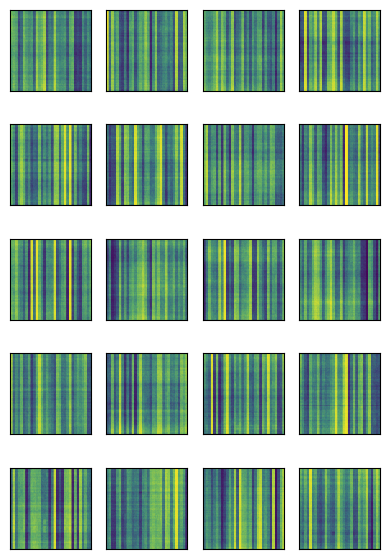

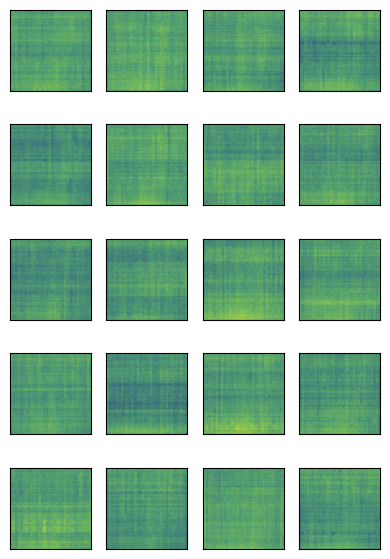

12.75
12.76
12.79
12.74
12.72
12.75
12.90
12.97
13.05
13.00
13.04
12.95
12.95
12.99
13.02
13.00
12.97
13.02
12.95
13.00


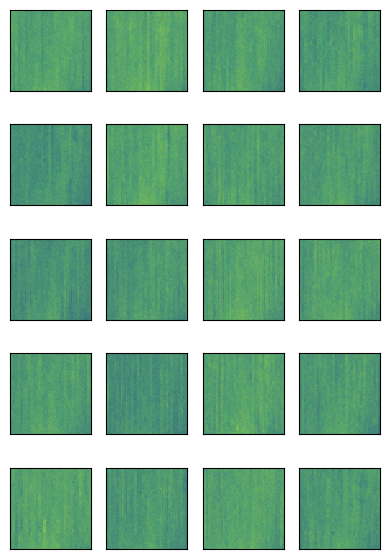

12.916771
2.70
2.59
2.74
4.26
3.21
2.77
3.61
3.24
3.11
3.34
4.13
3.45
2.38
3.81
3.56
3.11
3.63
2.72
2.79
3.25


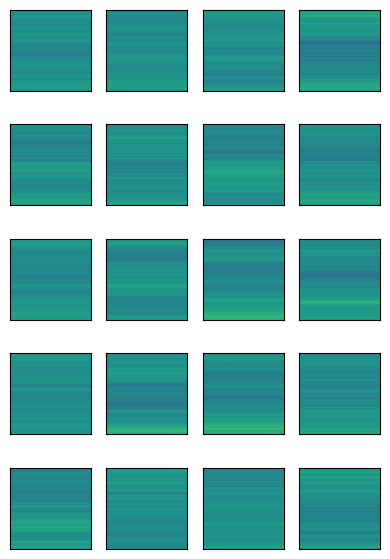

3.2589633


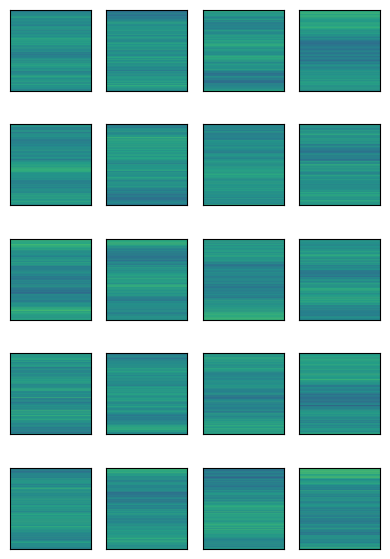

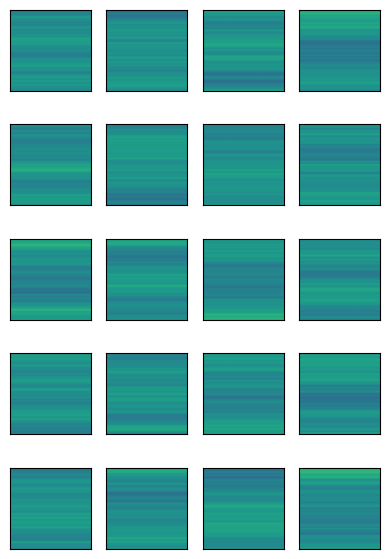

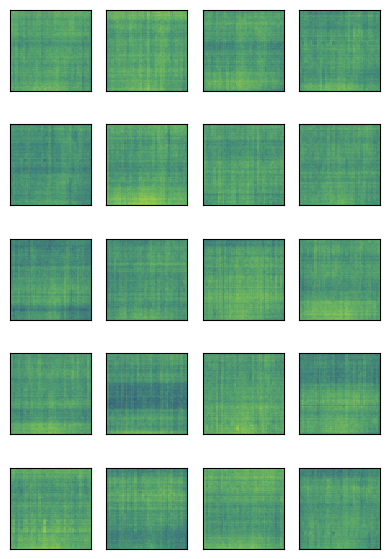

In [ ]:
fitspaths = sorted(glob.glob("/Users/alan/Downloads/frida/20251023/*.fits"))

ny = 5
nx = 4
vrange = 50
i0 = 4

fig, ax = plt.subplots(ny, nx, figsize=(4,6))
for i in range(0, ny * nx):

    header0, data0 = h2rg.readfits(fitspaths[i0+2*i+0])
    header1, data1 = h2rg.readfits(fitspaths[i0+2*i+1])

    data = data1 - data0
    data -= np.nanmedian(data[4:2044,4:2044])

    ax.flatten()[i].imshow(data, origin="lower", vmin=-0.5*vrange, vmax=+0.5*vrange)
    ax.flatten()[i].set_xticks([])
    ax.flatten()[i].set_yticks([])

plt.tight_layout()
plt.savefig("channelcorrection-raw-changes.png")
plt.show()

fig, ax = plt.subplots(ny, nx, figsize=(4,6))

for i in range(0, ny * nx):

    header0, data0 = h2rg.readfits(fitspaths[i0+2*i+0])
    header1, data1 = h2rg.readfits(fitspaths[i0+2*i+1])

    data = data1 - data0
    data -= np.nanmedian(data[4:2044,4:2044])
    data = h2rg.channelcorrection(data, order=1, verbose=False)

    ax.flatten()[i].imshow(data, origin="lower", vmin=-0.5*vrange, vmax=+0.5*vrange)
    ax.flatten()[i].set_xticks([])
    ax.flatten()[i].set_yticks([])

plt.tight_layout()
plt.savefig("channelcorrection-1-changes.png")
plt.show()


fig, ax = plt.subplots(ny, nx, figsize=(4,6))
stdlist = []
for i in range(0, ny * nx):

    header0, data0 = h2rg.readfits(fitspaths[i0+2*i+0])
    header1, data1 = h2rg.readfits(fitspaths[i0+2*i+1])

    data = data1 - data0
    data -= np.nanmedian(data[4:2044,4:2044])
    data = h2rg.channelcorrection(data, order=1, verbose=False)
    data = h2rg.rowcorrection(data, nxref=-1024)

    std = astropy.stats.mad_std(data, ignore_nan=True)
    print("%.2f" % std)
    stdlist.append(std)

    ax.flatten()[i].imshow(data, origin="lower", vmin=-0.5*vrange, vmax=+0.5*vrange)
    ax.flatten()[i].set_xticks([])
    ax.flatten()[i].set_yticks([])

plt.tight_layout()
plt.savefig("rowcorrection-1024-changes.png")
plt.show()

print(np.sqrt(np.mean(np.square(stdlist))))


fig, ax = plt.subplots(ny, nx, figsize=(4,6))
stdlist = []
for i in range(0, ny * nx):

    header0, data0 = h2rg.readfits(fitspaths[i0+2*i+0])
    header1, data1 = h2rg.readfits(fitspaths[i0+2*i+1])

    data = data1 - data0
    data -= np.nanmedian(data[4:2044,4:2044])
    data = h2rg.channelcorrection(data, order=1, verbose=False)
    data -= h2rg.rowcorrection(data, nxref=-1024)

    std = astropy.stats.mad_std(data, ignore_nan=True)
    print("%.2f" % std)
    stdlist.append(std)

    ax.flatten()[i].imshow(data, origin="lower", vmin=-0.5*vrange, vmax=+0.5*vrange)
    ax.flatten()[i].set_xticks([])
    ax.flatten()[i].set_yticks([])

plt.tight_layout()
plt.savefig("rowpattern-changes.png")
plt.show()

print(np.sqrt(np.mean(np.square(stdlist))))


fig, ax = plt.subplots(ny, nx, figsize=(4,6))
for i in range(0, ny * nx):

    header0, data0 = h2rg.readfits(fitspaths[i0+2*i+0])
    header1, data1 = h2rg.readfits(fitspaths[i0+2*i+1])

    data = data1 - data0
    data -= np.nanmedian(data[4:2044,4:2044])
    data = h2rg.channelcorrection(data, order=1, verbose=False)
    data -= h2rg.rowcorrection(data)

    ax.flatten()[i].imshow(data, origin="lower", vmin=-0.5*vrange, vmax=+0.5*vrange)
    ax.flatten()[i].set_xticks([])
    ax.flatten()[i].set_yticks([])

plt.tight_layout()
plt.savefig("rowcorrection-changes.png")
plt.show()


fig, ax = plt.subplots(ny, nx, figsize=(4,6))
for i in range(0, ny * nx):

    header0, data0 = h2rg.readfits(fitspaths[i0+2*i+0])
    header1, data1 = h2rg.readfits(fitspaths[i0+2*i+1])

    data = data1 - data0
    data -= np.nanmedian(data[4:2044,4:2044])
    data = h2rg.channelcorrection(data, order=1, verbose=False)
    data -= h2rg.rowcorrection(data, nfilter=51, verbose=False)

    ax.flatten()[i].imshow(data, origin="lower", vmin=-0.5*vrange, vmax=+0.5*vrange)
    ax.flatten()[i].set_xticks([])
    ax.flatten()[i].set_yticks([])

plt.tight_layout()
plt.savefig("rowpattern-51-changes.png")
plt.show()


fig, ax = plt.subplots(ny, nx, figsize=(4,6))
for i in range(0, ny * nx):

    header0, data0 = h2rg.readfits(fitspaths[i0+2*i+0])
    header1, data1 = h2rg.readfits(fitspaths[i0+2*i+1])

    data = data1 - data0
    data -= np.nanmedian(data[4:2044,4:2044])
    data = h2rg.channelcorrection(data, order=1, verbose=False)
    data = h2rg.rowcorrection(data, nfilter=51, verbose=False)

    ax.flatten()[i].imshow(data, origin="lower", vmin=-0.5*vrange, vmax=+0.5*vrange)
    ax.flatten()[i].set_xticks([])
    ax.flatten()[i].set_yticks([])

plt.tight_layout()
plt.savefig("rowcorrection-51-changes.png")
plt.show()




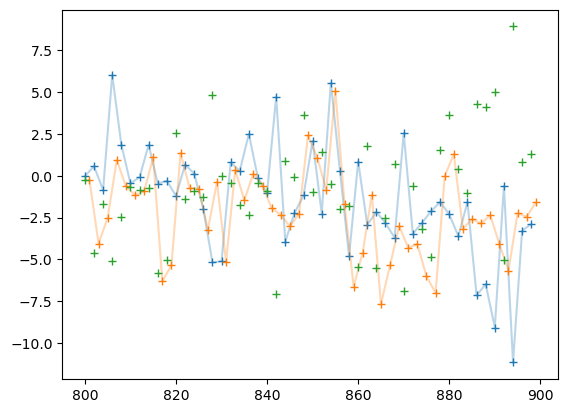

In [22]:
fitspaths = sorted(glob.glob("/Users/alan/Downloads/frida/20251023/*.fits"))

vrange = 50
i0 = 4


header0, data0 = h2rg.readfits(fitspaths[i0+0])
header1, data1 = h2rg.readfits(fitspaths[i0+1])

data = data1 - data0
data -= np.nanmedian(data[4:2044,4:2044])
data = h2rg.channelcorrection(data, order=1, verbose=False)
data -= h2rg.rowcorrection(data, nxref=-1024, verbose=False)

iy = range(0, 2048)
s0 = slice(800,900,2)
s1 = slice(801,901,2)
plt.plot(iy[s0],np.nanmedian(data,axis=1)[s0], marker="+", linestyle="none", color="C0")
plt.plot(iy[s0],np.nanmedian(data,axis=1)[s0], alpha=0.3, color="C0")
plt.plot(iy[s1],np.nanmedian(data,axis=1)[s1], marker="+", linestyle="none", color="C1")
plt.plot(iy[s1],np.nanmedian(data,axis=1)[s1], alpha=0.3, color="C1")

plt.plot(iy[s0],np.nanmedian(data,axis=1)[s1]-np.nanmedian(data,axis=1)[s0], marker="+", linestyle="none", color="C2")


In [ ]:
fitspaths = sorted(glob.glob("/Users/alan/Downloads/frida/20251023/*.fits"))

header0, data0 = h2rg.readfits(fitspaths[4])
header1, data1 = h2rg.readfits(fitspaths[5])

data = data1 - data0
data -= np.nanmedian(data[4:2044,4:2044])

vrange = 50
sd=slice(0,-1)

print("raw image")
imshow(data[sd,sd], vmin=-0.5*vrange, vmax=+0.5*vrange)
plt.savefig("channelcorrection-raw.png")
plt.show()

for order in [0, 1]:
    print("channel correction order %d" % order)
    refdata0 = h2rg.channelcorrection(data, order=order, verbose=False)
    print(astropy.stats.mad_std(refdata0[sd,sd], ignore_nan=True))
    imshow(refdata0[sd,sd],vmin=-0.5*vrange, vmax=+0.5*vrange)
    plt.savefig("channelcorrection-%d.png" % order)
    plt.show()
    imshow(refdata0-np.nanmedian(refdata0,axis=1)[:,np.newaxis],vmin=-0.5*vrange, vmax=+0.5*vrange)
    plt.savefig("channelcorrection-%d-difference.png" % order)
    plt.show()
    if False:
        for i in range(0,32):
            plt.title("Channel %d" % i)
            plt.plot(np.arange(2048), np.nanmedian(refdata0[:,i*64:(i+1)*64],axis=1))
            plt.show()

print("full-width row correction without filtering")
refwhole = h2rg.ycorrection(refdata0, nxref=1024, nfilter=None)
print(astropy.stats.mad_std(refdata0[sd,sd]-refwhole[sd,sd], ignore_nan=True))
imshow(refwhole[sd,sd],vmin=-0.5*vrange, vmax=+0.5*vrange)
plt.show()

if False:
    for nfilter in range(3,200,4):
        refdata1 = h2rg.ycorrection(refdata0,nxref=1024,nfilter=nfilter)
        print(nfilter, astropy.stats.mad_std(refdata1[sd,sd]-refwhole[sd,sd], ignore_nan=True))
        if False:
            imshow(refdata1[sd,sd],vmin=-0.5*vrange, vmax=+0.5*vrange)
            plt.show()

nfilter = 1


print("no row correction")
print(astropy.stats.mad_std(refdata0[sd,sd]-refwhole[sd,sd], ignore_nan=True))
imshow(refdata0[sd,sd],vmin=-0.5*vrange, vmax=+0.5*vrange)
plt.show()

print("normal row correction with nfilter = %d" % nfilter)
refdata1 = h2rg.ycorrection(refdata0, nxref=4, nfilter=nfilter, verbose=True)
print(astropy.stats.mad_std(refdata1[sd,sd]-refwhole[sd,sd], ignore_nan=True))
imshow(refdata1[sd,sd],vmin=-0.5*vrange, vmax=+0.5*vrange)
plt.show()

print("normal row correction with nfilter = %d without first and last" % nfilter)
refdata0[:,0] = np.nan
refdata0[:,2047] = np.nan

refdata1 = h2rg.ycorrection(refdata0, nxref=4, nfilter=nfilter, verbose=True)
print(astropy.stats.mad_std(refdata1[sd,sd]-refwhole[sd,sd], ignore_nan=True))
imshow(refdata1[sd,sd],vmin=-0.5*vrange, vmax=+0.5*vrange)
plt.show()

print("internal row correction 8 columns with nfilter = %d" % nfilter)
refdata1 = h2rg.ycorrection(refdata0, nxref=-4, nfilter=nfilter, verbose=True)
print(astropy.stats.mad_std(refdata1[sd,sd]-refwhole[sd,sd], ignore_nan=True))
imshow(refdata1[sd,sd],vmin=-0.5*vrange, vmax=+0.5*vrange)
plt.show()

print("internal row correction 64 columns with nfilter = %d" % nfilter)
refdata1 = h2rg.ycorrection(refdata0, nxref=-32, nfilter=nfilter, verbose=True)
print(astropy.stats.mad_std(refdata1[sd,sd]-refwhole[sd,sd], ignore_nan=True))
imshow(refdata1[sd,sd],vmin=-0.5*vrange, vmax=+0.5*vrange)
plt.show()

print("full-width row correction with nfilter = %d" % nfilter)
refdata1 = h2rg.ycorrection(refdata0, nxref=1024, nfilter=nfilter, verbose=True)
print(astropy.stats.mad_std(refdata1[sd,sd]-refwhole[sd,sd], ignore_nan=False))
imshow(refdata1[sd,sd],vmin=-0.5*vrange, vmax=+0.5*vrange)
plt.show()


In [ ]:
fitspaths = sorted(glob.glob("/Users/alan/Downloads/frida/20251023/*.fits"))

header0, data0 = h2rg.readfits(fitspaths[4])
header1, data1 = h2rg.readfits(fitspaths[5])

data = data1 - data0
data -= np.nanmedian(data)

vrange = 50
sd=slice(0,-1)

refdata0 = h2rg.channelcorrection(data, order=1, verbose=False)

yref0=np.nanmedian(refdata0[:,0:4], axis=1)
yref1=np.nanmedian(refdata0[:,-5:-1], axis=1)
yrefwhole=np.median(refdata0, axis=1)

nfilter=61
plt.plot(np.arange(0,len(yrefwhole)),scipy.ndimage.median_filter(yrefwhole, nfilter))
plt.plot(np.arange(0,len(yrefwhole)),scipy.ndimage.median_filter(yref0, nfilter))
plt.plot(np.arange(0,len(yrefwhole)),scipy.ndimage.median_filter(yref1, nfilter))
plt.show()

nfilter=61
plt.plot(np.arange(0,len(yrefwhole)),scipy.ndimage.median_filter(yref0, nfilter)-scipy.ndimage.median_filter(yrefwhole, nfilter))
plt.plot(np.arange(0,len(yrefwhole)),scipy.ndimage.median_filter(yref1, nfilter)-scipy.ndimage.median_filter(yrefwhole, nfilter))
plt.show()

plt.xlim(500,600)
plt.plot(np.arange(0,len(yrefwhole)),yrefwhole,marker="+", label="whole")
plt.show()

plt.xlim(500,600)
plt.plot(np.arange(0,len(yrefwhole)),yref0-yrefwhole,marker="+", label="ref0")
plt.plot(np.arange(0,len(yrefwhole)),yref1-yrefwhole,marker="+", label="ref1")
plt.legend()
plt.show()

yref = 0.5 * (yref0+yref1)
plt.xlim(500,600)
plt.plot(np.arange(0,len(yrefwhole)),yref-yrefwhole,marker="+", label="ref")
plt.legend()
plt.show()


def _clippedmean(data, axis=None, sigma=3):
    mean, median, stdde = astropy.stats.sigma_clipped_stats(
        data, axis=None, sigma=sigma, cenfunc=np.nanmedian
    )
    return mean

plt.imshow(np.roll(refdata0,4,axis=1)[0:32,0:32])
plt.show()

yref = _clippedmean(np.roll(refdata0,4,axis=1)[:,0:8],axis=1)
plt.xlim(500,600)
plt.plot(np.arange(0,len(yrefwhole)),yref-yrefwhole,marker="+", label="ref")
plt.legend()
plt.show()

import scipy.signal
print(yrefwhole.shape)
print(np.transpose(yrefwhole).shape)
f, p = scipy.signal.periodogram(yrefwhole)
plt.plot(f, p)
plt.show()



/Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_07.021_00006.fits   0     4.77 1.000
/Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_08.497_00007.fits   1     9.54 1.000
/Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_09.973_00008.fits   2    15.65 1.000
/Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_11.449_00009.fits   3    17.49 1.000
/Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_12.925_00010.fits   4    21.47 1.000
/Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_14.401_00011.fits   5    27.11 1.000
/Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_15.877_00012.fits   6    30.06 1.000
/Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_17.353_00013.fits   7    35.72 1.000
/Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_18.829_00014.fits   8    36.81 1.000
/Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_20.305_00015.fits   9    42.49 1.000
/Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_21.781_00016.fits  10    

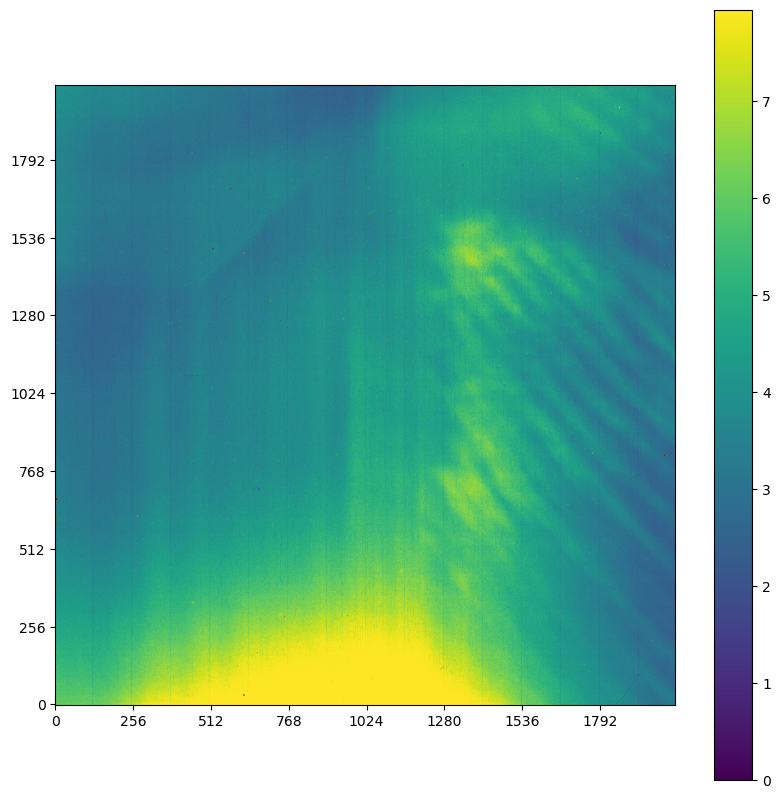

In [142]:
fitspaths = sorted(glob.glob("/Users/alan/Downloads/frida/20251023/*.fits"))
#fitspaths = sorted(glob.glob("/Users/alan/Downloads/frida/20251027/0/*.fits"))

i0 = 5
m = 40
nmax = 40
datamax = 20000

m = np.ones((2048,2048))
n = np.zeros((2048,2048))
sumx = np.zeros((2048,2048))
sumy = np.zeros((2048,2048))
sumxx = np.zeros((2048,2048))
sumxy = np.zeros((2048,2048))


nmax = len(fitspaths[:nmax])

header0, data0 = h2rg.readfits(fitspaths[i0-1])
for x, fitspath in zip(range(0, nmax), fitspaths[i0:][:nmax]):
    header, data = h2rg.readfits(fitspath)
    data -= data0
    data = h2rg.channelcorrection(data, order=1)
    m[data > datamax] = 0
    print("%s %3d %8.2f %.3f" % (fitspath, x, np.nanmedian(data), np.count_nonzero(m) / np.size(m)))
    y = data
    n += m
    sumx += m * x
    sumy += m * y
    sumxx += m * x * x
    sumxy += m * x * y

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    b = (n * sumxy - sumx * sumy) / (n * sumxx - sumx * sumx)
    a = (sumy / n) - b * (sumx / n)
print(np.nanmedian(b))

plt.figure(figsize=(10,10))
sy = slice(4,2044)
sx = slice(4,2044)
imshow(b[sy,sx], vmin=0, vmax=np.nanmedian(b)*2)





/Users/alan/Downloads/frida/20251027/0/H2RG_Oct-27-18_42_46.534_00006.fits   0 12707.00 1.000
/Users/alan/Downloads/frida/20251027/0/H2RG_Oct-27-18_42_48.009_00007.fits   1 15206.00 1.000
/Users/alan/Downloads/frida/20251027/0/H2RG_Oct-27-18_42_49.485_00008.fits   2 17682.00 1.000
/Users/alan/Downloads/frida/20251027/0/H2RG_Oct-27-18_42_50.962_00009.fits   3 20140.00 1.000
/Users/alan/Downloads/frida/20251027/0/H2RG_Oct-27-18_42_52.438_00010.fits   4 22575.00 1.000
/Users/alan/Downloads/frida/20251027/0/H2RG_Oct-27-18_42_53.914_00011.fits   5 24979.00 1.000
/Users/alan/Downloads/frida/20251027/0/H2RG_Oct-27-18_42_55.389_00012.fits   6 27361.00 1.000
/Users/alan/Downloads/frida/20251027/0/H2RG_Oct-27-18_42_56.865_00013.fits   7 29693.00 1.000
/Users/alan/Downloads/frida/20251027/0/H2RG_Oct-27-18_42_58.342_00014.fits   8 32016.00 0.998
/Users/alan/Downloads/frida/20251027/0/H2RG_Oct-27-18_42_59.818_00015.fits   9 34305.00 0.993
/Users/alan/Downloads/frida/20251027/0/H2RG_Oct-27-18_43_01.

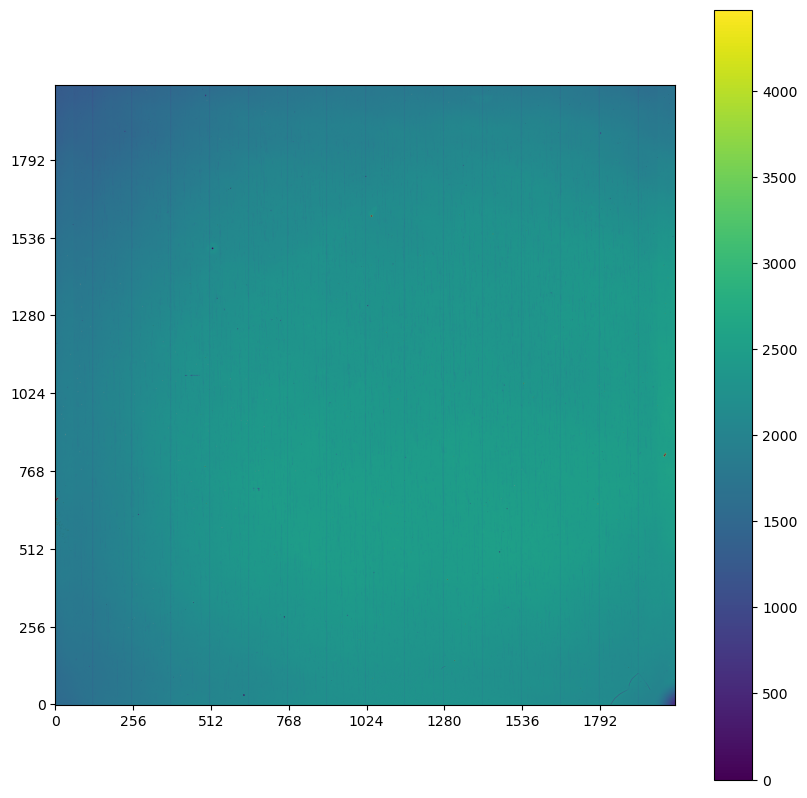

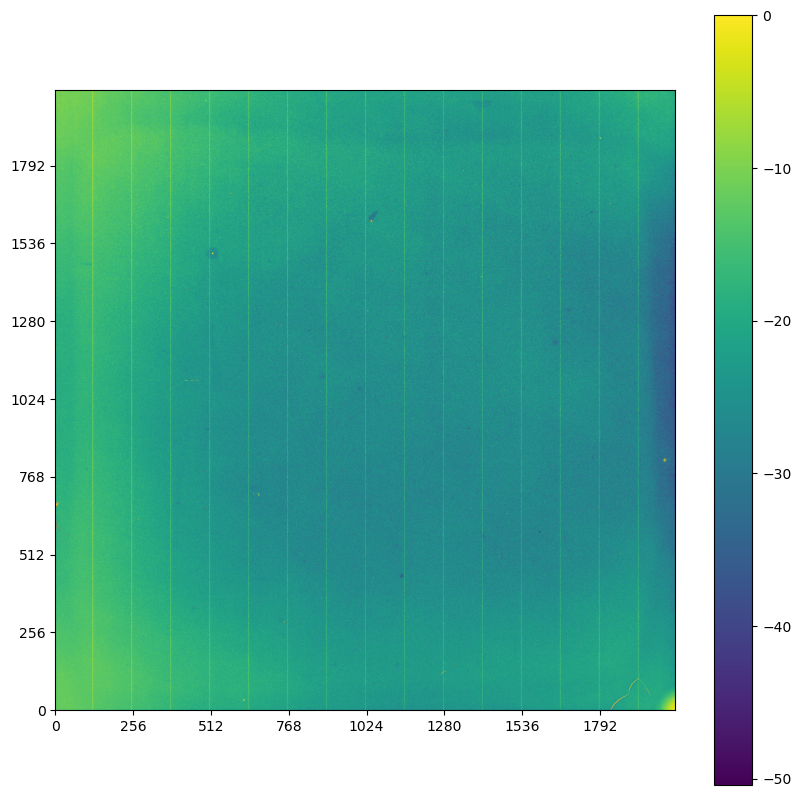

[  -14.80267519  2683.7644768  11356.28177083]


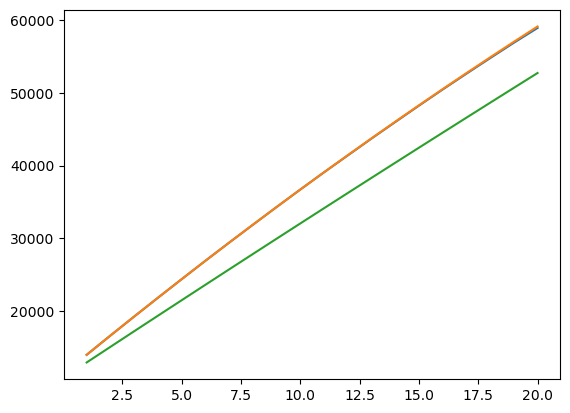

[ -26.32940867 2328.50378418]


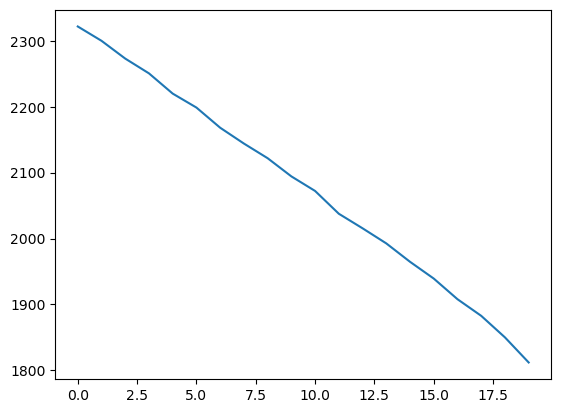

In [140]:
fitspaths = sorted(glob.glob("/Users/alan/Downloads/frida/20251023/*.fits"))
fitspaths = sorted(glob.glob("/Users/alan/Downloads/frida/20251027/0/*.fits"))

i0 = 5
nmax = 20
datamax = 40000

sy = slice(4, 2044)
sx = slice(4, 2044)


sy = slice(1024, 1280)
sx = slice(1024, 1280)

m = np.ones((2048, 2048))
n = np.zeros((2048, 2048))
sumx = np.zeros((2048, 2048))
sumy = np.zeros((2048, 2048))
sumxx = np.zeros((2048, 2048))
sumxy = np.zeros((2048, 2048))

meany = []
meanddata = []

nmax = len(fitspaths[:nmax])

header0, data0 = h2rg.readfits(fitspaths[i0 - 1])
for x, fitspath in zip(range(0, nmax), fitspaths[i0:][:nmax]):
    header, data = h2rg.readfits(fitspath)
    ddata = data - data0
    data0 = data
    ddata = h2rg.channelcorrection(ddata, order=1)
    m[data > datamax] = 0
    print(
        "%s %3d %8.2f %.3f"
        % (fitspath, x, np.nanmedian(data), np.count_nonzero(m) / np.size(m))
    )
    y = ddata
    n += m
    sumx += m * x
    sumy += m * y
    sumxx += m * x * x
    sumxy += m * x * y
    meany.append(np.nanmean(data[sy, sx]))
    meanddata.append(np.nanmean(ddata[sy, sx]))
    if x == 0:
        A = data

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    b = (n * sumxy - sumx * sumy) / (n * sumxx - sumx * sumx)
    a = (sumy / n) - b * (sumx / n)
    C = 0.25 * b
    B = a - C
print(np.nanmedian(a))
print(np.nanmedian(b))

sy = slice(4, 2044)
sx = slice(4, 2044)

plt.figure(figsize=(10, 10))
imshow(a[sy, sx], vmin=0, vmax=np.nanmedian(a) * 2)
plt.show()

plt.figure(figsize=(10, 10))
imshow(b[sy, sx], vmin=0, vmax=np.nanmedian(b) * 2)
plt.show()

x = np.arange(0, len(meany)) + 1
plt.plot(x, meany)

p = np.polyfit(x[:10],meany[:10],2)
print(p)
plt.plot(x,p[2]+x*p[1]+x*x*p[0])

A = np.nanmean(A[sy, sx])
B = np.nanmean(B[sy, sx])
C = np.nanmean(C[sy, sx])
C = C / 2
x += 5
plt.plot(x-5, B * x + C * x * x)
plt.show()

plt.plot(np.arange(0,len(meanddata)), meanddata)
print(np.polyfit(np.arange(0,len(meanddata)), meanddata,1))